# 1083 Albumin Analysis with Updated Dataset

### By: Ian Weimer

## ML Caveats

### If the feature space is not correlated enough with the target variable, then generally  no model can have any meaningful predictive power.

### Individual variables do not necessarily need to have high correlations with the target variable (although this is generally a good thing), but altogether, the variables need to be correlated/predictive enough of the target variable. 

## Imports

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
import scipy.stats
pd.set_option('display.max_columns', None)

## Preprocessing and Exploratory Data Analysis 

## Load Albumin Data

In [2]:
pwd

'/Users/ianweimer/1083-albumin-data-exploration/ML'

In [3]:
df_alb = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/gi_bleed_anemia_all-4.csv', index_col=0)

In [4]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

            index_date   age sex   race  zip_code bed_size  ICU  \
0  2019-05-31 13:58:00  45.0   M  Black         1   >=1000    1   
1  2019-03-07 20:26:00  54.0   F  White         7  500-999    1   
2  2019-07-17 23:07:00  79.0   M  White         9   >=1000    0   
3  2020-06-21 14:45:00  75.0   M  Other         1   >=1000    0   
4  2017-01-12 17:18:00  74.0   F  Black         1   >=1000    0   

   total_ICU_LOS_hours    LOS_hours  mass_transfusion  total_transfusions  \
0          7956.633333  1016.016667                 0                   1   
1          4045.563333   531.133333                 1                   0   
2                  NaN    26.383333                 0                   1   
3                  NaN    50.916667                 0                   1   
4                  NaN  1500.383333                 0                   0   

  anemia_status  CCI  30_day_mortality  30_day_readmission  \
0      moderate    6                 0                   0   
1          none    4                 0                   1   
2        severe    6                 0                   1   
3          none    2                 1                   0   
4          none    6                 0                   0   

   days_until_readmission  bl_albumin_value  last_albumin_value  \
0              758.111111               2.9                 3.2   
1               18.750000               3.1                 2.7   
2                2.806250               NaN                 NaN   
3                     NaN               NaN                 NaN   
4                     NaN               2.0                 2.4   

   albumin_lab_baseline_severity  normal_albumin_achieved  hemoglobin  \
0                            1.0                      1.0         8.4   
1                            0.0                      NaN        11.2   
2                            NaN                      NaN         4.8   
3                            NaN                      NaN        15.6   
4                            1.0                      0.0        14.7   

   time_to_albumin  albumin_timing  5_percent_albumin  25_percent_albumin  \
0       166.966667               0                  0                   0   
1       225.116667               0                  0                   1   
2         3.018056               1                  0                   1   
3        28.250000               0                  1                   1   
4       189.700000               0                  0                   0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                     1  11.0      1          0             1            0   
1                     0   NaN      0          1             0            0   
2                     1   NaN      0          0             1            0   
3                     1   NaN      1          0             0            0   
4                     1  15.0      1          0             1            0   

   SAPS  tenant  
0    34      45  
1    18      36  
2    29       7  
3    67      45  
4    28      46

In [5]:
df_alb.shape

(22192, 35)

In [6]:
print('Number of unique patients:', df_alb.personid.nunique())
print('Number of unique encounters:', df_alb.encounterid.nunique())

Number of unique patients: 20734
Number of unique encounters: 22192


In [7]:
df_alb.isnull().sum()

personid                             0
encounterid                          0
index_date                           0
age                                  2
sex                                 44
race                              1083
zip_code                             0
bed_size                             0
ICU                                  0
total_ICU_LOS_hours              15107
LOS_hours                            1
mass_transfusion                     0
total_transfusions                   0
anemia_status                        0
CCI                                  0
30_day_mortality                     0
30_day_readmission                   0
days_until_readmission            9400
bl_albumin_value                  8627
last_albumin_value                8627
albumin_lab_baseline_severity     8627
normal_albumin_achieved          13462
hemoglobin                         968
time_to_albumin                     93
albumin_timing                       0
5_percent_albumin        

## Load Non Albumin Data

In [8]:
df_no_alb = pd.read_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/no_albumin_gi_bleed_anemia_all-3.csv', index_col=0)

In [9]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

            index_date   age sex   race  zip_code bed_size  ICU  \
0  2018-12-11 02:47:00  76.0   M  White         8   >=1000    0   
1  2018-12-22 18:14:00  80.0   F  White         1   >=1000    0   
2  2017-05-20 15:01:00  62.0   M  White         9   >=1000    0   
3  2018-11-29 21:57:00  86.0   M  White         0  500-999    0   
4  2020-02-08 21:45:16  75.0   F  White         3  500-999    0   

   total_ICU_LOS_hours   LOS_hours  mass_transfusion  total_transfusions  \
0                  NaN  208.016667                 0                   0   
1                  NaN  245.266667                 0                   1   
2                  NaN   51.650000                 0                   0   
3                  NaN  191.700000                 0                   1   
4                  NaN  121.412222                 0                   1   

  anemia_status  CCI  30_day_mortality  30_day_readmission  \
0      moderate    2                 0                   0   
1        severe    2                 0                   0   
2          none    3                 0                   0   
3      moderate    2                 0                   1   
4      moderate    5                 0                   0   

   days_until_readmission  bl_albumin_value  last_albumin_value  \
0              321.625000               3.3                 2.9   
1               33.510417               NaN                 NaN   
2              559.286806               4.0                 3.4   
3               10.081944               3.3                 3.1   
4              122.702975               NaN                 NaN   

   albumin_lab_baseline_severity  normal_albumin_achieved  hemoglobin  MELD  \
0                            0.0                      NaN         7.4  13.0   
1                            NaN                      NaN         4.3  11.0   
2                            0.0                      NaN        11.7   6.0   
3                            0.0                      NaN         8.0   7.0   
4                            NaN                      NaN         8.5   NaN   

   qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  
0      1          1             0            0    22      63  
1      0          0             0            0    32      45  
2      0          1             0            0    33      68  
3      2          0             0            0    39      51  
4      0          0             0            0    16     113

In [10]:
df_no_alb.shape

(134739, 30)

In [11]:
print('Number of unique patients:', df_no_alb.personid.nunique())
print('Number of unique encounters:', df_no_alb.encounterid.nunique())

Number of unique patients: 106515
Number of unique encounters: 134739


In [12]:
df_no_alb.isnull().sum()

personid                              0
encounterid                           0
index_date                            0
age                                   1
sex                                 319
race                               5886
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours              114288
LOS_hours                            20
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            39273
bl_albumin_value                  84489
last_albumin_value                84489
albumin_lab_baseline_severity     84489
normal_albumin_achieved          114420
hemoglobin                        19241
MELD                              75143
qSOFA                                 0


## Examine Difference In Vars

In [13]:
lst1 = df_alb.columns.tolist()
lst1

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'hemoglobin',
 'time_to_albumin',
 'albumin_timing',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [14]:
lst2 = df_no_alb.columns.tolist()
lst2

['personid',
 'encounterid',
 'index_date',
 'age',
 'sex',
 'race',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'normal_albumin_achieved',
 'hemoglobin',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant']

In [15]:
lst3 = [x for x in lst1 if x not in lst2]

In [16]:
lst3

['time_to_albumin',
 'albumin_timing',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type']

In [17]:
df_alb[['time_to_albumin', 'albumin_timing', '5_percent_albumin', \
       '25_percent_albumin', 'unknown_albumin_type']].head(10)

time_to_albumin  albumin_timing  5_percent_albumin  25_percent_albumin  \
0       166.966667               0                  0                   0   
1       225.116667               0                  0                   1   
2         3.018056               1                  0                   1   
3        28.250000               0                  1                   1   
4       189.700000               0                  0                   0   
5       550.833333               0                  1                   0   
6        17.600000               1                  0                   0   
7         2.250000               1                  0                   0   
8        73.900000               0                  0                   1   
9        38.790556               0                  0                   1   

   unknown_albumin_type  
0                     1  
1                     0  
2                     1  
3                     1  
4                     1  
5                     0  
6                     1  
7                     1  
8                     0  
9                     0

## Remove variables not relevant to analysis 

In [18]:
# Removing these variables: 
# Unnamed: 0 (index), index_date
# Keeping personid, encounterid for now
# But will drop these later as well

df_alb.drop(columns = ['index_date'], inplace=True)

df_no_alb.drop(columns = ['index_date'], inplace=True)

## Create binary "Albumin" variable for both datasets

In [19]:
# albumin dataset = all 1s 
df_alb = df_alb.assign(albumin = 1)

In [20]:
# no albumin dataset = all 0s
df_no_alb = df_no_alb.assign(albumin = 0)

In [21]:
df_alb.shape

(22192, 35)

In [22]:
df_no_alb.shape

(134739, 30)

In [23]:
df_alb.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0   M  Black         1   >=1000    1          7956.633333  1016.016667   
1  54.0   F  White         7  500-999    1          4045.563333   531.133333   
2  79.0   M  White         9   >=1000    0                  NaN    26.383333   
3  75.0   M  Other         1   >=1000    0                  NaN    50.916667   
4  74.0   F  Black         1   >=1000    0                  NaN  1500.383333   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   1      moderate    6                 0   
1                 1                   0          none    4                 0   
2                 0                   1        severe    6                 0   
3                 0                   1          none    2                 1   
4                 0                   0          none    6                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   1               18.750000               3.1   
2                   1                2.806250               NaN   
3                   0                     NaN               NaN   
4                   0                     NaN               2.0   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 3.2                            1.0                      1.0   
1                 2.7                            0.0                      NaN   
2                 NaN                            NaN                      NaN   
3                 NaN                            NaN                      NaN   
4                 2.4                            1.0                      0.0   

   hemoglobin  time_to_albumin  albumin_timing  5_percent_albumin  \
0         8.4       166.966667               0                  0   
1        11.2       225.116667               0                  0   
2         4.8         3.018056               1                  0   
3        15.6        28.250000               0                  1   
4        14.7       189.700000               0                  0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                   0                     1  11.0      1          0   
1                   1                     0   NaN      0          1   
2                   1                     1   NaN      0          0   
3                   1                     1   NaN      1          0   
4                   0                     1  15.0      1          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0             1            0    34      45        1  
1             0            0    18      36        1  
2             1            0    29       7        1  
3             0            0    67      45        1  
4             1            0    28      46        1

In [24]:
df_no_alb.head()

personid                           encounterid  \
0  0034c8e8-d981-401f-99c3-49c522415c3f  cf7ca286-ddc2-4e64-ae66-d660698de715   
1  0094a748-b23f-4704-8df0-6f6c112c022d  3d654b3b-e615-4805-8d23-4c5498246111   
2  009e66f6-5527-48bc-af91-f624389ebc0f  fc8a5d62-a07b-4e7c-9686-dfb55e07d6c2   
3  00a04a10-5e1e-4aed-9649-8d2b1771a3c5  ae85bfb3-a977-4dfe-96cf-4c63d10af095   
4  00b9ab91-733a-48c7-b0d7-0738c02b3a1a  2d33ea02-bf05-4f51-b815-13f8e39edef1   

    age sex   race  zip_code bed_size  ICU  total_ICU_LOS_hours   LOS_hours  \
0  76.0   M  White         8   >=1000    0                  NaN  208.016667   
1  80.0   F  White         1   >=1000    0                  NaN  245.266667   
2  62.0   M  White         9   >=1000    0                  NaN   51.650000   
3  86.0   M  White         0  500-999    0                  NaN  191.700000   
4  75.0   F  White         3  500-999    0                  NaN  121.412222   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   0      moderate    2                 0   
1                 0                   1        severe    2                 0   
2                 0                   0          none    3                 0   
3                 0                   1      moderate    2                 0   
4                 0                   1      moderate    5                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              321.625000               3.3   
1                   0               33.510417               NaN   
2                   0              559.286806               4.0   
3                   1               10.081944               3.3   
4                   0              122.702975               NaN   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 2.9                            0.0                      NaN   
1                 NaN                            NaN                      NaN   
2                 3.4                            0.0                      NaN   
3                 3.1                            0.0                      NaN   
4                 NaN                            NaN                      NaN   

   hemoglobin  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  \
0         7.4  13.0      1          1             0            0    22   
1         4.3  11.0      0          0             0            0    32   
2        11.7   6.0      0          1             0            0    33   
3         8.0   7.0      2          0             0            0    39   
4         8.5   NaN      0          0             0            0    16   

   tenant  albumin  
0      63        0  
1      45        0  
2      68        0  
3      51        0  
4     113        0

## Combine Datasets

In [25]:
df = pd.concat([df_alb, df_no_alb], axis=0)

In [26]:
df.shape

(156931, 35)

In [27]:
df.head(50)

personid  \
0   001c4742-8e99-4929-9b1c-0b8c6f3e230a   
1   019634ce-13e2-4f8c-9f7f-ba5fba461d1f   
2   01d02e7a-3cd1-47dd-9d5f-188e591a04df   
3   05b4f125-f42f-4ade-ad65-f6d591c51790   
4   077a4e0b-b3ba-4025-a8b6-46a51d5183c6   
5   088a0350-8d51-43dd-9472-b208278372ae   
6   0a3154dd-d980-434a-af99-6f25cad83298   
7   0bffecfb-6f3f-4fba-a73f-684dfb888b33   
8   10b58aae-9abd-40f6-b1ed-fb394b5a8e57   
9   138a5556-63ee-4e60-b826-e1dc72628a0a   
10  19ae9a31-6f48-41e9-8902-65e6b2d3d001   
11  1b32ad01-1ee5-4c32-939b-eb6e6e5e3a48   
12  1d7f46c0-6f92-403b-b24c-cb4b653dca99   
13  1df390c3-18b8-41b0-acd9-23495059e97a   
14  1f7e4dd3-9985-4039-8099-ecea6ec7b94d   
15  1fd1313b-acbb-4744-828f-6a6809dbf561   
16  23221ca2-943d-40b1-8566-dc3e9d515775   
17  247c6aba-af0a-47fb-989a-f529ab420605   
18  2634b554-7b04-4abf-969d-2ffcde666661   
19  28ed58a7-f0a6-4383-8fa4-2e902b48ffc4   
20  2a2b87b9-905b-4ab7-8ba2-d63e7a3618ca   
21  2ab3ed5c-6e1d-41b0-b298-87aa387ceb13   
22  2b0bd82b-e305-4991-baf2-49a302ab1d2e   
23  2b4b67be-894a-415d-b241-6f64f5220bfb   
24  2d4989b3-7bd5-43a9-bf7f-f23e1b9bcb22   
25  2e2a8de8-2c5c-4a16-9fec-24e32d68ee56   
26  304a6435-d093-46ba-9eeb-28c65cfadf65   
27  3156e8fc-240f-40c8-8db2-c2446b652659   
28  359efbf5-44c0-4454-b18a-85a8e961d0d2   
29  36bac901-4c48-46d1-80dd-96cd8705fccd   
30  370a3e99-33e6-404a-8db4-187b1ba0a648   
31  37538836-dd53-4916-8614-d2d5067d17bd   
32  385016ac-0885-4fd8-8761-c65af40f66da   
33  394ffd20-e1e7-44c2-b991-93f115e71da0   
34  39d47ec2-2f69-4ab7-a93a-c59319331259   
35  3cc07cf0-d9b1-486a-a33f-7a0db69304dd   
36  3dd84581-4d59-43f2-ad28-8533144312cc   
37  3e61e48c-91d7-466b-8dff-89c791002dc6   
38  43c7671f-8311-40d6-861f-91e668874c01   
39  4977e0ee-27ef-4f1f-9833-3e26ddbc39b3   
40  4a8d6b06-391b-4c3d-8f9c-3dfd1f2cbffa   
41  4bf4a15e-626c-429c-9e90-86f7d31bc966   
42  4daa05d1-bbf7-462f-8623-fed7204b3135   
43  4ead1736-858d-4cdb-9adc-76a6660ca497   
44  4f141045-4c7d-4084-ae1d-99a994aebec8   
45  511e7212-cb6a-4a04-9d88-7f9fc66014d8   
46  51ae902d-1230-4cd4-b1b0-f8d5161d9f27   
47  51dabe14-cc4a-452c-9b2c-8d8d63b921c8   
48  52fa1f23-6e2e-4e9d-8c3e-9fe2265e946f   
49  53cd5eeb-a66b-4683-8950-845856616db6   

                             encounterid   age sex   race  zip_code bed_size  \
0   4f8fae0f-a286-4120-b78c-c60086d95f88  45.0   M  Black         1   >=1000   
1   9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a  54.0   F  White         7  500-999   
2   eef69bb8-c0a3-425d-b016-7df3a2903ed5  79.0   M  White         9   >=1000   
3   2ae26cea-7902-40ea-9f24-d65f49d03724  75.0   M  Other         1   >=1000   
4   2227d951-5657-47a0-aa62-4dcd86d6d04d  74.0   F  Black         1   >=1000   
5   3d2b1e18-f0ca-42d7-9de1-f46dfcd400a9  42.0   M  Other         0   >=1000   
6   6466f5b2-20e7-4176-9f9c-2d9aeb4219f3  54.0   M  Other         1  500-999   
7   ae7dea86-adfc-48b9-84dd-bf7c4857f6e9  80.0   F  White         6  500-999   
8   2f9f4bd9-bd8b-4c61-a734-b5892bcc96fb  69.0   M  White         8   >=1000   
9   57dc97c2-2c28-43a1-8c15-bf7d918c6adc  73.0   M  White         2  500-999   
10  2c452c1e-8405-4692-baf1-1b2159d32e56  74.0   F  White         1   >=1000   
11  dd91c4d5-223e-41c9-afb1-894bb57b5d52  68.0   M  White         2  300-499   
12  a4e130d7-c9d0-4c2b-a71c-6d2540891463  73.0   M  White         6  500-999   
13  83aedaea-94b0-405c-a1ea-94fee7f50b52  58.0   M  Black         2  500-999   
14  b08d47a1-2a9e-4b7a-b008-f71641dcb93a  70.0   F  White         8   >=1000   
15  5d04e556-8062-4b2b-b6a1-6b0acf42cc83  69.0   M  White         1   >=1000   
16  ea4557d7-2508-45a7-ac19-9655112734ee  87.0   M  White         3  500-999   
17  7190384c-1ac1-4939-b4e8-c55282fcfcaf  77.0   F  White         1   >=1000   
18  4eeb4e42-95c6-4b90-8849-60920805623b  87.0   F  White         6  500-999   
19  b4696974-2401-4aac-88c3-e398df348d35  54.0   F  White         8   >=1000   
20  61c5c634-45f5-4671-a17e-021071364ddd  54.0   F  White         1   >=1000   
21  0298c107-0e87-48fc-a9ca

In [28]:
df.columns

Index(['personid', 'encounterid', 'age', 'sex', 'race', 'zip_code', 'bed_size',
       'ICU', 'total_ICU_LOS_hours', 'LOS_hours', 'mass_transfusion',
       'total_transfusions', 'anemia_status', 'CCI', '30_day_mortality',
       '30_day_readmission', 'days_until_readmission', 'bl_albumin_value',
       'last_albumin_value', 'albumin_lab_baseline_severity',
       'normal_albumin_achieved', 'hemoglobin', 'time_to_albumin',
       'albumin_timing', '5_percent_albumin', '25_percent_albumin',
       'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker',
       'hemorrhagic', 'SAPS', 'tenant', 'albumin'],
      dtype='object')

## Look at variables, null values

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156931 entries, 0 to 134738
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   personid                       156931 non-null  object 
 1   encounterid                    156931 non-null  object 
 2   age                            156928 non-null  float64
 3   sex                            156568 non-null  object 
 4   race                           149962 non-null  object 
 5   zip_code                       156931 non-null  int64  
 6   bed_size                       156870 non-null  object 
 7   ICU                            156931 non-null  int64  
 8   total_ICU_LOS_hours            27536 non-null   float64
 9   LOS_hours                      156910 non-null  float64
 10  mass_transfusion               156931 non-null  int64  
 11  total_transfusions             156931 non-null  int64  
 12  anemia_status                 

In [30]:
df.isnull().sum()

# total_ICU_LOS_hours  set as 0
# days_until_readmission remove

# bl_albumin_value                  remove all
# last_albumin_value                
# albumin_lab_baseline_severity

# normal_albumin_achieved  \\ started out low, achieved normal albumin
# patients with low albumin initially
# remove

# time_to_albumin
# albumin_timing - 24 hrs albumin

# time_to_albumin -- remove variable completely

personid                              0
encounterid                           0
age                                   3
sex                                 363
race                               6969
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours              129395
LOS_hours                            21
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            48673
bl_albumin_value                  93116
last_albumin_value                93116
albumin_lab_baseline_severity     93116
normal_albumin_achieved          127882
hemoglobin                        20209
time_to_albumin                  134832
albumin_timing                   134739
5_percent_albumin                134739


In [31]:
df['race'].value_counts()

White      114079
Other       18417
Black       16008
Unknown      1458
Name: race, dtype: int64

In [32]:
df['sex'].value_counts()

M    85572
F    70991
O        5
Name: sex, dtype: int64

In [33]:
df['bed_size'].value_counts()

>=1000     99196
500-999    39977
300-499    11803
200-299     3911
<100        1365
100-199      618
Name: bed_size, dtype: int64

## Fill or Drop Rows with Null Values, Other

In [34]:
# drop time_to_albumin variable

df.drop(columns = ['time_to_albumin'], inplace=True)

In [35]:
# change name of albumin_timing to albumin_24hrs var

df.rename(columns = {'albumin_timing':'albumin_24hrs'}, inplace=True)

In [36]:
# fill in all NA related to albumin variables with 0
# fill in total ICU LOS hours with 0

df['albumin_24hrs'] = df['albumin_24hrs'].fillna(0)
df['5_percent_albumin'] = df['5_percent_albumin'].fillna(0)
df['25_percent_albumin'] = df['25_percent_albumin'].fillna(0)
df['unknown_albumin_type'] = df['unknown_albumin_type'].fillna(0)
df['total_ICU_LOS_hours'] = df['total_ICU_LOS_hours'].fillna(0)

In [37]:
df.head()

personid                           encounterid  \
0  001c4742-8e99-4929-9b1c-0b8c6f3e230a  4f8fae0f-a286-4120-b78c-c60086d95f88   
1  019634ce-13e2-4f8c-9f7f-ba5fba461d1f  9f6f2d9f-2534-4e4b-b9c3-9eece9c44e3a   
2  01d02e7a-3cd1-47dd-9d5f-188e591a04df  eef69bb8-c0a3-425d-b016-7df3a2903ed5   
3  05b4f125-f42f-4ade-ad65-f6d591c51790  2ae26cea-7902-40ea-9f24-d65f49d03724   
4  077a4e0b-b3ba-4025-a8b6-46a51d5183c6  2227d951-5657-47a0-aa62-4dcd86d6d04d   

    age sex   race  zip_code bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0   M  Black         1   >=1000    1          7956.633333  1016.016667   
1  54.0   F  White         7  500-999    1          4045.563333   531.133333   
2  79.0   M  White         9   >=1000    0             0.000000    26.383333   
3  75.0   M  Other         1   >=1000    0             0.000000    50.916667   
4  74.0   F  Black         1   >=1000    0             0.000000  1500.383333   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   1      moderate    6                 0   
1                 1                   0          none    4                 0   
2                 0                   1        severe    6                 0   
3                 0                   1          none    2                 1   
4                 0                   0          none    6                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   1               18.750000               3.1   
2                   1                2.806250               NaN   
3                   0                     NaN               NaN   
4                   0                     NaN               2.0   

   last_albumin_value  albumin_lab_baseline_severity  normal_albumin_achieved  \
0                 3.2                            1.0                      1.0   
1                 2.7                            0.0                      NaN   
2                 NaN                            NaN                      NaN   
3                 NaN                            NaN                      NaN   
4                 2.4                            1.0                      0.0   

   hemoglobin  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0         8.4            0.0                0.0                 0.0   
1        11.2            0.0                0.0                 1.0   
2         4.8            1.0                0.0                 1.0   
3        15.6            0.0                1.0                 1.0   
4        14.7            0.0                0.0                 0.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
1                   0.0   NaN      0          1             0            0   
2                   1.0   NaN      0          0             1            0   
3                   1.0   NaN      1          0             0            0   
4                   1.0  15.0      1          0             1            0   

   SAPS  tenant  albumin  
0    34      45        1  
1    18      36        1  
2    29       7        1  
3    67      45        1  
4    28      46        1

In [38]:
df.isnull().sum()

personid                              0
encounterid                           0
age                                   3
sex                                 363
race                               6969
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours                   0
LOS_hours                            21
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            48673
bl_albumin_value                  93116
last_albumin_value                93116
albumin_lab_baseline_severity     93116
normal_albumin_achieved          127882
hemoglobin                        20209
albumin_24hrs                         0
5_percent_albumin                     0
25_percent_albumin                    0


In [39]:
# drop null time_to_albumin variable because it is problematic
# with no_albumin data
#df.drop(columns = ['time_to_albumin'], inplace=True)

In [40]:
df.isnull().sum()

personid                              0
encounterid                           0
age                                   3
sex                                 363
race                               6969
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours                   0
LOS_hours                            21
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            48673
bl_albumin_value                  93116
last_albumin_value                93116
albumin_lab_baseline_severity     93116
normal_albumin_achieved          127882
hemoglobin                        20209
albumin_24hrs                         0
5_percent_albumin                     0
25_percent_albumin                    0


In [41]:
# fill null race values with 'Unknown'
# df['race'] = df['race'].fillna('Unknown')

In [42]:
# df.isnull().sum()

In [43]:
# df['race'].value_counts()

In [44]:
# after considering encoding, I chose to drop race 
# variable entirely, as it would require one-hot encoding 
# to be properly represented, in contrast to the other variables

df.drop(columns = ['race'], inplace=True)

In [45]:
df.shape

(156931, 33)

In [46]:
# remove 'O' in sex, as it has only 5 values
df.drop(df[df['sex'] == 'O'].index, inplace=True)

In [47]:
df['sex'].value_counts()

M    85569
F    70991
Name: sex, dtype: int64

In [48]:
df.isnull().sum()

personid                              0
encounterid                           0
age                                   3
sex                                 363
zip_code                              0
bed_size                             61
ICU                                   0
total_ICU_LOS_hours                   0
LOS_hours                            21
mass_transfusion                      0
total_transfusions                    0
anemia_status                         0
CCI                                   0
30_day_mortality                      0
30_day_readmission                    0
days_until_readmission            48669
bl_albumin_value                  93113
last_albumin_value                93113
albumin_lab_baseline_severity     93113
normal_albumin_achieved          127875
hemoglobin                        20206
albumin_24hrs                         0
5_percent_albumin                     0
25_percent_albumin                    0
unknown_albumin_type                  0


## Drop normal_albumin_achieved var

In [49]:
df.drop(columns = ['normal_albumin_achieved'], inplace=True)

In [50]:
# Note: entire variables (with null values) 
# could be dropped later if not useful 

df.dropna(inplace=True)

In [51]:
df.isnull().sum()

personid                         0
encounterid                      0
age                              0
sex                              0
zip_code                         0
bed_size                         0
ICU                              0
total_ICU_LOS_hours              0
LOS_hours                        0
mass_transfusion                 0
total_transfusions               0
anemia_status                    0
CCI                              0
30_day_mortality                 0
30_day_readmission               0
days_until_readmission           0
bl_albumin_value                 0
last_albumin_value               0
albumin_lab_baseline_severity    0
hemoglobin                       0
albumin_24hrs                    0
5_percent_albumin                0
25_percent_albumin               0
unknown_albumin_type             0
MELD                             0
qSOFA                            0
Cirrhosis                        0
beta_blocker                     0
hemorrhagic         

In [52]:
df.shape

(21601, 32)

In [53]:
df['albumin'].value_counts()

0    18370
1     3231
Name: albumin, dtype: int64

In [54]:
df['qSOFA'].describe()

count    21601.000000
mean         0.444470
std          0.660234
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: qSOFA, dtype: float64

In [55]:
df['SAPS'].describe()

count    21601.000000
mean        25.922920
std         11.286153
min          0.000000
25%         18.000000
50%         24.000000
75%         32.000000
max         91.000000
Name: SAPS, dtype: float64

## Drop patientid and encounterid variables

In [56]:
df.shape

(21601, 32)

In [57]:
df['personid'].nunique()

19694

In [58]:
df['encounterid'].nunique()

21601

In [59]:
#these will not be useful for exploratory analyis / modeling
df.drop(columns = ['personid', 'encounterid'], inplace=True)

In [60]:
df.shape

(21601, 30)

In [61]:
df.head()

age sex  zip_code bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0   45.0   M         1   >=1000    1          7956.633333  1016.016667   
9   73.0   M         2  500-999    0             0.000000   135.266667   
29  44.0   M         8   >=1000    0             0.000000   884.533333   
32  65.0   M         9   >=1000    0             0.000000   176.250000   
53  83.0   M         5  200-299    0             0.000000   314.066667   

    mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                  0                   1      moderate    6                 0   
9                  0                   0        severe    2                 0   
29                 0                   0      moderate    3                 0   
32                 0                   1      moderate    4                 0   
53                 0                   0          none    4                 0   

    30_day_readmission  days_until_readmission  bl_albumin_value  \
0                    0              758.111111               2.9   
9                    0              771.349306               1.5   
29                   0              524.800694               1.5   
32                   0              127.484722               3.3   
53                   1               28.059722               3.9   

    last_albumin_value  albumin_lab_baseline_severity  hemoglobin  \
0                  3.2                            1.0         8.4   
9                  1.8                            1.0         5.6   
29                 3.5                            1.0         8.3   
32                 2.7                            0.0         8.4   
53                 3.0                            0.0        11.3   

    albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0             0.0                0.0                 0.0   
9             0.0                0.0                 1.0   
29            0.0                0.0                 1.0   
32            0.0                0.0                 1.0   
53            0.0                0.0                 1.0   

    unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                    1.0  11.0      1          0             1            0   
9                    0.0   9.0      0          1             0            0   
29                   0.0  18.0      3          0             1            0   
32                   0.0  20.0      0          0             0            0   
53                   0.0  17.0      0          0             1            0   

    SAPS  tenant  albumin  
0     34      45        1  
9     43     111        1  
29    45      63        1  
32    41      57        1  
53    29      34        1

In [62]:
# make sure all null counts are same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21601 entries, 0 to 134737
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            21601 non-null  float64
 1   sex                            21601 non-null  object 
 2   zip_code                       21601 non-null  int64  
 3   bed_size                       21601 non-null  object 
 4   ICU                            21601 non-null  int64  
 5   total_ICU_LOS_hours            21601 non-null  float64
 6   LOS_hours                      21601 non-null  float64
 7   mass_transfusion               21601 non-null  int64  
 8   total_transfusions             21601 non-null  int64  
 9   anemia_status                  21601 non-null  object 
 10  CCI                            21601 non-null  int64  
 11  30_day_mortality               21601 non-null  int64  
 12  30_day_readmission             21601 non-null

## Encode Variables as Necessary

In [63]:
# Binary Variables: sex

# Ordinal Variables: bed_size, anemia_status

# Neither: race (removed)

In [64]:
df['sex'].value_counts()

M    11917
F     9684
Name: sex, dtype: int64

In [65]:
df['bed_size'].value_counts()

>=1000     15466
500-999     4114
300-499     1161
200-299      693
<100         149
100-199       18
Name: bed_size, dtype: int64

In [66]:
df['anemia_status'].value_counts()

moderate    8704
severe      6217
none        4672
mild        2008
Name: anemia_status, dtype: int64

In [67]:
# initialize encoders
# used labelencoder() for binary variable
sex_enc = preprocessing.LabelEncoder()

In [68]:
# used ordinal encoder for education and income
# labelencoder() does not work well for these variables
# they are not in the preferred order
# ordinal encoder allows for setting order

bs_ord = [['<100', '100-199', '200-299', '300-499', \
          '500-999', '>=1000']]

as_ord = [['none', 'mild', 'moderate', 'severe']]

transformer = make_column_transformer(
    (OrdinalEncoder(categories=bs_ord), ['bed_size']),
    (OrdinalEncoder(categories=as_ord), ['anemia_status']),
)

In [69]:
sex_enc.fit(df['sex'])

LabelEncoder()

In [70]:
df['sex'] = sex_enc.transform(df['sex'])

In [71]:
df['sex'].value_counts()

1    11917
0     9684
Name: sex, dtype: int64

In [72]:
df = df.reset_index(drop=True)

In [73]:
df.head()

age  sex  zip_code bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0    1         1   >=1000    1          7956.633333  1016.016667   
1  73.0    1         2  500-999    0             0.000000   135.266667   
2  44.0    1         8   >=1000    0             0.000000   884.533333   
3  65.0    1         9   >=1000    0             0.000000   176.250000   
4  83.0    1         5  200-299    0             0.000000   314.066667   

   mass_transfusion  total_transfusions anemia_status  CCI  30_day_mortality  \
0                 0                   1      moderate    6                 0   
1                 0                   0        severe    2                 0   
2                 0                   0      moderate    3                 0   
3                 0                   1      moderate    4                 0   
4                 0                   0          none    4                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   0              771.349306               1.5   
2                   0              524.800694               1.5   
3                   0              127.484722               3.3   
4                   1               28.059722               3.9   

   last_albumin_value  albumin_lab_baseline_severity  hemoglobin  \
0                 3.2                            1.0         8.4   
1                 1.8                            1.0         5.6   
2                 3.5                            1.0         8.3   
3                 2.7                            0.0         8.4   
4                 3.0                            0.0        11.3   

   albumin_24hrs  5_percent_albumin  25_percent_albumin  unknown_albumin_type  \
0            0.0                0.0                 0.0                   1.0   
1            0.0                0.0                 1.0                   0.0   
2            0.0                0.0                 1.0                   0.0   
3            0.0                0.0                 1.0                   0.0   
4            0.0                0.0                 1.0                   0.0   

   MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0  11.0      1          0             1            0    34      45        1  
1   9.0      0          1             0            0    43     111        1  
2  18.0      3          0             1            0    45      63        1  
3  20.0      0          0             0            0    41      57        1  
4  17.0      0          0             1            0    29      34        1

In [74]:
#df1 = df[df['bed_size'].notna()]
#df1 = df1[df1['anemia_status'].notna()]
#df1 = df1[df1['age'].notna()]
#df1 = df1[df1['LOS_hours'].notna()]

In [75]:
df.isnull().sum()

age                              0
sex                              0
zip_code                         0
bed_size                         0
ICU                              0
total_ICU_LOS_hours              0
LOS_hours                        0
mass_transfusion                 0
total_transfusions               0
anemia_status                    0
CCI                              0
30_day_mortality                 0
30_day_readmission               0
days_until_readmission           0
bl_albumin_value                 0
last_albumin_value               0
albumin_lab_baseline_severity    0
hemoglobin                       0
albumin_24hrs                    0
5_percent_albumin                0
25_percent_albumin               0
unknown_albumin_type             0
MELD                             0
qSOFA                            0
Cirrhosis                        0
beta_blocker                     0
hemorrhagic                      0
SAPS                             0
tenant              

In [76]:
df1 = pd.DataFrame(transformer.fit_transform(df),
                  columns = ['bed_size', 'anemia_status'])

In [77]:
display(df1.dtypes)

bed_size         float64
anemia_status    float64
dtype: object

In [78]:
#df1 = df1.astype({"bed_size": 'int', "anemia_status": 'int'})

In [79]:
df1.isnull().sum()

bed_size         0
anemia_status    0
dtype: int64

In [80]:
df1.head()

bed_size  anemia_status
0       5.0            2.0
1       4.0            3.0
2       5.0            2.0
3       5.0            2.0
4       2.0            0.0

In [81]:
df1['bed_size'].value_counts()

5.0    15466
4.0     4114
3.0     1161
2.0      693
0.0      149
1.0       18
Name: bed_size, dtype: int64

In [82]:
df1['anemia_status'].value_counts()

2.0    8704
3.0    6217
0.0    4672
1.0    2008
Name: anemia_status, dtype: int64

In [83]:
# replace bed_size and anemia_status vars with transformed vars

df['bed_size'] = df1['bed_size']
df['anemia_status'] = df1['anemia_status']

#df.loc[:, ['bed_size', 'anemia_status']] = df1[['bed_size', 'anemia_status']]


In [84]:
df['bed_size'].value_counts()

5.0    15466
4.0     4114
3.0     1161
2.0      693
0.0      149
1.0       18
Name: bed_size, dtype: int64

In [85]:
df.head()

age  sex  zip_code  bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0    1         1       5.0    1          7956.633333  1016.016667   
1  73.0    1         2       4.0    0             0.000000   135.266667   
2  44.0    1         8       5.0    0             0.000000   884.533333   
3  65.0    1         9       5.0    0             0.000000   176.250000   
4  83.0    1         5       2.0    0             0.000000   314.066667   

   mass_transfusion  total_transfusions  anemia_status  CCI  30_day_mortality  \
0                 0                   1            2.0    6                 0   
1                 0                   0            3.0    2                 0   
2                 0                   0            2.0    3                 0   
3                 0                   1            2.0    4                 0   
4                 0                   0            0.0    4                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   0              771.349306               1.5   
2                   0              524.800694               1.5   
3                   0              127.484722               3.3   
4                   1               28.059722               3.9   

   last_albumin_value  albumin_lab_baseline_severity  hemoglobin  \
0                 3.2                            1.0         8.4   
1                 1.8                            1.0         5.6   
2                 3.5                            1.0         8.3   
3                 2.7                            0.0         8.4   
4                 3.0                            0.0        11.3   

   albumin_24hrs  5_percent_albumin  25_percent_albumin  unknown_albumin_type  \
0            0.0                0.0                 0.0                   1.0   
1            0.0                0.0                 1.0                   0.0   
2            0.0                0.0                 1.0                   0.0   
3            0.0                0.0                 1.0                   0.0   
4            0.0                0.0                 1.0                   0.0   

   MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0  11.0      1          0             1            0    34      45        1  
1   9.0      0          1             0            0    43     111        1  
2  18.0      3          0             1            0    45      63        1  
3  20.0      0          0             0            0    41      57        1  
4  17.0      0          0             1            0    29      34        1

In [86]:
df['bed_size']

0        5.0
1        4.0
2        5.0
3        5.0
4        2.0
        ... 
21596    5.0
21597    5.0
21598    5.0
21599    5.0
21600    3.0
Name: bed_size, Length: 21601, dtype: float64

In [87]:
df.shape

(21601, 30)

In [88]:
df.head()

age  sex  zip_code  bed_size  ICU  total_ICU_LOS_hours    LOS_hours  \
0  45.0    1         1       5.0    1          7956.633333  1016.016667   
1  73.0    1         2       4.0    0             0.000000   135.266667   
2  44.0    1         8       5.0    0             0.000000   884.533333   
3  65.0    1         9       5.0    0             0.000000   176.250000   
4  83.0    1         5       2.0    0             0.000000   314.066667   

   mass_transfusion  total_transfusions  anemia_status  CCI  30_day_mortality  \
0                 0                   1            2.0    6                 0   
1                 0                   0            3.0    2                 0   
2                 0                   0            2.0    3                 0   
3                 0                   1            2.0    4                 0   
4                 0                   0            0.0    4                 0   

   30_day_readmission  days_until_readmission  bl_albumin_value  \
0                   0              758.111111               2.9   
1                   0              771.349306               1.5   
2                   0              524.800694               1.5   
3                   0              127.484722               3.3   
4                   1               28.059722               3.9   

   last_albumin_value  albumin_lab_baseline_severity  hemoglobin  \
0                 3.2                            1.0         8.4   
1                 1.8                            1.0         5.6   
2                 3.5                            1.0         8.3   
3                 2.7                            0.0         8.4   
4                 3.0                            0.0        11.3   

   albumin_24hrs  5_percent_albumin  25_percent_albumin  unknown_albumin_type  \
0            0.0                0.0                 0.0                   1.0   
1            0.0                0.0                 1.0                   0.0   
2            0.0                0.0                 1.0                   0.0   
3            0.0                0.0                 1.0                   0.0   
4            0.0                0.0                 1.0                   0.0   

   MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  SAPS  tenant  albumin  
0  11.0      1          0             1            0    34      45        1  
1   9.0      0          1             0            0    43     111        1  
2  18.0      3          0             1            0    45      63        1  
3  20.0      0          0             0            0    41      57        1  
4  17.0      0          0             1            0    29      34        1

In [89]:
df.columns.tolist()

['age',
 'sex',
 'zip_code',
 'bed_size',
 'ICU',
 'total_ICU_LOS_hours',
 'LOS_hours',
 'mass_transfusion',
 'total_transfusions',
 'anemia_status',
 'CCI',
 '30_day_mortality',
 '30_day_readmission',
 'days_until_readmission',
 'bl_albumin_value',
 'last_albumin_value',
 'albumin_lab_baseline_severity',
 'hemoglobin',
 'albumin_24hrs',
 '5_percent_albumin',
 '25_percent_albumin',
 'unknown_albumin_type',
 'MELD',
 'qSOFA',
 'Cirrhosis',
 'beta_blocker',
 'hemorrhagic',
 'SAPS',
 'tenant',
 'albumin']

In [90]:
# rearrange columns to put dvs at end

#f_df = f_df[['age', 'sex', 'zip_code', 'bed_size', 'ICU', \
#          'mass_transfusion', 'total_transfusions', 'anemia_status', \
#            'CCI', 'tenant', 'albumin', \
#            'LOS_hours', '30_day_mortality', '30_day_readmission']]

In [91]:
# quick look at distributions

df.describe()

age           sex      zip_code      bed_size           ICU  \
count  21601.000000  21601.000000  21601.000000  21601.000000  21601.000000   
mean      66.182029      0.551687      4.792047      4.567983      0.220082   
std       15.411862      0.497333      3.430149      0.832678      0.414312   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       57.000000      0.000000      1.000000      4.000000      0.000000   
50%       68.000000      1.000000      6.000000      5.000000      0.000000   
75%       78.000000      1.000000      8.000000      5.000000      0.000000   
max       89.000000      1.000000      9.000000      5.000000      1.000000   

       total_ICU_LOS_hours     LOS_hours  mass_transfusion  \
count         21601.000000  21601.000000      21601.000000   
mean            789.629936    214.023908          0.028749   
std            6861.787347    334.730935          0.167103   
min               0.000000      2.216667          0.000000   
25%               0.000000     76.080000          0.000000   
50%               0.000000    122.200000          0.000000   
75%               0.000000    230.350000          0.000000   
max          486617.752778  17711.316667          1.000000   

       total_transfusions  anemia_status           CCI  30_day_mortality  \
count        21601.000000   21601.000000  21601.000000      21601.000000   
mean             0.920883       1.762280      3.731401          0.031434   
std              2.145320       1.090623      2.652965          0.174491   
min              0.000000       0.000000      0.000000          0.000000   
25%              0.000000       1.000000      2.000000          0.000000   
50%              0.000000       2.000000      3.000000          0.000000   
75%              1.000000       3.000000      5.000000          0.000000   
max             99.000000       3.000000     19.000000          1.000000   

       30_day_readmission  days_until_readmission  bl_albumin_value  \
count        21601.000000            21601.000000      21601.000000   
mean             0.424749              148.269891          3.122480   
std              0.494316              250.778001          0.679965   
min              0.000000                0.000012          0.200000   
25%              0.000000               12.142361          2.700000   
50%              0.000000               43.192361          3.100000   
75%              1.000000              163.543275          3.600000   
max              1.000000             2277.159028          6.300000   

       last_albumin_value  albumin_lab_baseline_severity    hemoglobin  \
count        21601.000000                   21601.000000  21601.000000   
mean             2.757712                       0.392898      8.751565   
std              0.573386                       0.488406      2.778780   
min              0.100000                       0.000000      1.900000   
25%              2.400000                       0.000000      6.700000   
50%              2.800000                       0.000000      8.400000   
75%              3.100000                       1.000000     10.600000   
max              5.600000                       1.000000     20.800000   

       albumin_24hrs  5_percent_albumin  25_percent_albumin  \
count   21601.000000       21601.000000        21601.000000   
mean        0.055784           0.049072            0.075969   
std         0.229510           0.216023            0.264954   
min         0.000000           0.000000            0.000000   
25%         0.000000           0.000000            0.000000   
50%         0.000000           0.000000            0.000000   
75%         0.000000           0.000000            0.000000   
max         1.000000           1.000000            1.000000   

       unknown_albumin_type          MELD         qSOFA     Cirrhosis  \
count          21601.000000  21601.000000  21601.000000  21601.000000   
mean               0.088700     12.3701

In [92]:
df.isnull().sum()

age                              0
sex                              0
zip_code                         0
bed_size                         0
ICU                              0
total_ICU_LOS_hours              0
LOS_hours                        0
mass_transfusion                 0
total_transfusions               0
anemia_status                    0
CCI                              0
30_day_mortality                 0
30_day_readmission               0
days_until_readmission           0
bl_albumin_value                 0
last_albumin_value               0
albumin_lab_baseline_severity    0
hemoglobin                       0
albumin_24hrs                    0
5_percent_albumin                0
25_percent_albumin               0
unknown_albumin_type             0
MELD                             0
qSOFA                            0
Cirrhosis                        0
beta_blocker                     0
hemorrhagic                      0
SAPS                             0
tenant              

In [93]:
df.drop(columns=['zip_code'], inplace=True)

## Remove outliers

In [94]:
# remove outliers more than 3sd from the mean

z_scores = stats.zscore(df[['age', 'total_transfusions', 'hemoglobin', 'total_ICU_LOS_hours', \
                            'LOS_hours', 'SAPS', 'days_until_readmission']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [95]:
df.shape

(19993, 29)

## Add Albumin Difference Variable

In [96]:
# albumin increase

df['alb_diff'] = df['last_albumin_value'] - df['bl_albumin_value']

## Remove albumin_lab_baseline_severity variable

In [97]:
df['albumin_lab_baseline_severity'].value_counts()

0.0    12192
1.0     7801
Name: albumin_lab_baseline_severity, dtype: int64

In [98]:
# it is all 1s provides no value

df.drop(columns = ['albumin_lab_baseline_severity'], inplace=True)

In [99]:
# save df copy

f_df = df.copy()

## Look at Variable Correlations, Significance with Outcome Variables

## Length of Stay (LOS)

In [100]:
# drop other dvs: 30_day_mortality, 30_day_readmission

df = f_df.drop(columns=['30_day_mortality', '30_day_readmission', \
                       'total_ICU_LOS_hours', 'days_until_readmission'])

In [101]:
df.head()

age  sex  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1  1016.016667                 0   
1  73.0    1       4.0    0   135.266667                 0   
2  44.0    1       5.0    0   884.533333                 0   
3  65.0    1       5.0    0   176.250000                 0   
4  83.0    1       2.0    0   314.066667                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
3                   1            2.0    4               3.3   
4                   0            0.0    4               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

In [102]:
df['albumin_24hrs'].describe()

count    19993.000000
mean         0.050918
std          0.219835
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: albumin_24hrs, dtype: float64

## Correlations

In [103]:
df.head()

age  sex  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1  1016.016667                 0   
1  73.0    1       4.0    0   135.266667                 0   
2  44.0    1       5.0    0   884.533333                 0   
3  65.0    1       5.0    0   176.250000                 0   
4  83.0    1       2.0    0   314.066667                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
3                   1            2.0    4               3.3   
4                   0            0.0    4               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

In [104]:
# look at variable correlations with Length of Stay (LOS)
corr_mat = df.corr()['LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

last_albumin_value     -0.237166
anemia_status          -0.141754
bl_albumin_value       -0.141214
alb_diff               -0.080336
tenant                 -0.038237
Cirrhosis              -0.019693
total_transfusions     -0.014030
sex                     0.002218
age                     0.004477
bed_size                0.018490
hemorrhagic             0.104980
ICU                     0.112686
albumin_24hrs           0.119299
MELD                    0.128071
beta_blocker            0.131932
mass_transfusion        0.147422
hemoglobin              0.154142
qSOFA                   0.156965
CCI                     0.185614
SAPS                    0.192027
25_percent_albumin      0.279247
5_percent_albumin       0.279697
unknown_albumin_type    0.371517
albumin                 0.413151
LOS_hours               1.000000
Name: LOS_hours, dtype: float64


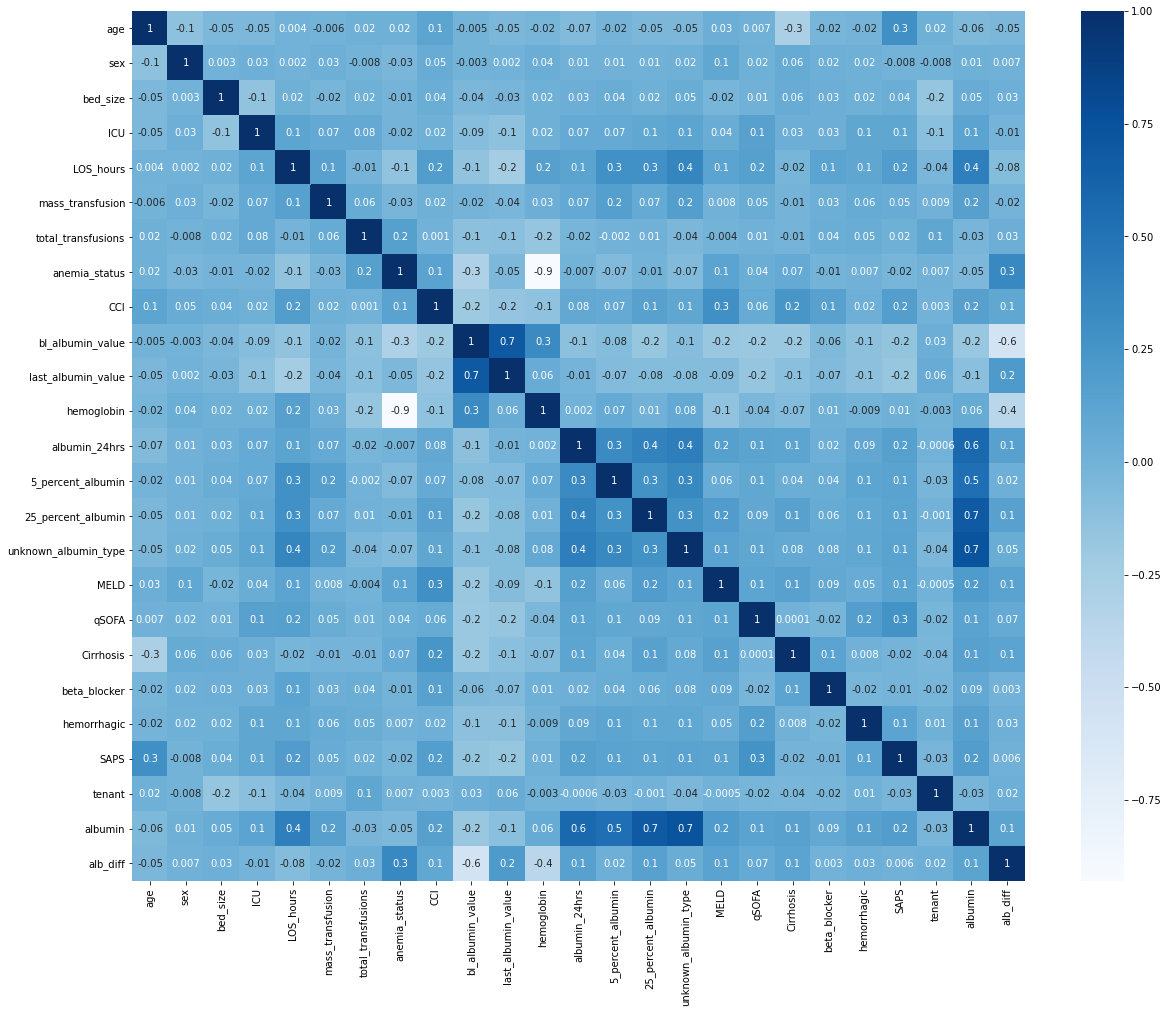

In [105]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [106]:
df.head()

age  sex  bed_size  ICU    LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1  1016.016667                 0   
1  73.0    1       4.0    0   135.266667                 0   
2  44.0    1       5.0    0   884.533333                 0   
3  65.0    1       5.0    0   176.250000                 0   
4  83.0    1       2.0    0   314.066667                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
3                   1            2.0    4               3.3   
4                   0            0.0    4               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

In [107]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'LOS_hours', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'bl_albumin_value', 'last_albumin_value', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [108]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['LOS_hours'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [109]:
sig_df

Var      Corr        p-value
0                    age  0.004477   5.267208e-01
1                    sex  0.002218   7.538468e-01
2               bed_size  0.018490   8.934831e-03
3                    ICU  0.112686   1.668944e-57
4              LOS_hours  1.000000   0.000000e+00
5       mass_transfusion  0.147422   1.574980e-97
6     total_transfusions -0.014030   4.728369e-02
7          anemia_status -0.141754   3.035374e-90
8                    CCI  0.185614  1.939302e-154
9       bl_albumin_value -0.141214   1.448592e-89
10    last_albumin_value -0.237166  1.176223e-253
11            hemoglobin  0.154142  1.503199e-106
12         albumin_24hrs  0.119299   2.799939e-64
13     5_percent_albumin  0.279697   0.000000e+00
14    25_percent_albumin  0.279247   0.000000e+00
15  unknown_albumin_type  0.371517   0.000000e+00
16                  MELD  0.128071   7.089024e-74
17                 qSOFA  0.156965  1.826829e-110
18             Cirrhosis -0.019693   5.358492e-03
19          beta_blocker  0.131932   2.541985e-78
20           hemorrhagic  0.104980   4.185039e-50
21                  SAPS  0.192027  2.349008e-165
22                tenant -0.038237   6.363630e-08
23               albumin  0.413151   0.000000e+00
24              alb_diff -0.080336   5.453301e-30

In [110]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
2               bed_size  0.018490   8.934831e-03
3                    ICU  0.112686   1.668944e-57
4              LOS_hours  1.000000   0.000000e+00
5       mass_transfusion  0.147422   1.574980e-97
6     total_transfusions -0.014030   4.728369e-02
7          anemia_status -0.141754   3.035374e-90
8                    CCI  0.185614  1.939302e-154
9       bl_albumin_value -0.141214   1.448592e-89
10    last_albumin_value -0.237166  1.176223e-253
11            hemoglobin  0.154142  1.503199e-106
12         albumin_24hrs  0.119299   2.799939e-64
13     5_percent_albumin  0.279697   0.000000e+00
14    25_percent_albumin  0.279247   0.000000e+00
15  unknown_albumin_type  0.371517   0.000000e+00
16                  MELD  0.128071   7.089024e-74
17                 qSOFA  0.156965  1.826829e-110
18             Cirrhosis -0.019693   5.358492e-03
19          beta_blocker  0.131932   2.541985e-78
20           hemorrhagic  0.104980   4.185039e-50
21                  SAPS  0.192027  2.349008e-165
22                tenant -0.038237   6.363630e-08
23               albumin  0.413151   0.000000e+00
24              alb_diff -0.080336   5.453301e-30

In [111]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
0  age  0.004477  0.526721
1  sex  0.002218  0.753847

## ICU Length of Stay (ICU LOS)

In [112]:
# drop other dvs: 30_day_mortality, 30_day_readmission, etc

df = f_df.drop(columns=['30_day_mortality', '30_day_readmission', \
                       'LOS_hours', 'days_until_readmission'])

In [113]:
df.head()

age  sex  bed_size  ICU  total_ICU_LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1          7956.633333                 0   
1  73.0    1       4.0    0             0.000000                 0   
2  44.0    1       5.0    0             0.000000                 0   
3  65.0    1       5.0    0             0.000000                 0   
4  83.0    1       2.0    0             0.000000                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
3                   1            2.0    4               3.3   
4                   0            0.0    4               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

In [114]:
df['albumin_24hrs'].describe()

count    19993.000000
mean         0.050918
std          0.219835
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: albumin_24hrs, dtype: float64

## Correlations

In [115]:
df.head()

age  sex  bed_size  ICU  total_ICU_LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1          7956.633333                 0   
1  73.0    1       4.0    0             0.000000                 0   
2  44.0    1       5.0    0             0.000000                 0   
3  65.0    1       5.0    0             0.000000                 0   
4  83.0    1       2.0    0             0.000000                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
3                   1            2.0    4               3.3   
4                   0            0.0    4               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

In [116]:
# look at variable correlations with total_ICU_LOS_hours
corr_mat = df.corr()['total_ICU_LOS_hours']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

last_albumin_value     -0.112283
bed_size               -0.071690
anemia_status          -0.068888
alb_diff               -0.061186
bl_albumin_value       -0.049758
tenant                 -0.032930
age                    -0.022640
Cirrhosis              -0.010730
sex                     0.022183
total_transfusions      0.030086
MELD                    0.048367
albumin_24hrs           0.050647
CCI                     0.057245
beta_blocker            0.069768
hemorrhagic             0.072614
hemoglobin              0.079244
SAPS                    0.079687
qSOFA                   0.095483
mass_transfusion        0.130579
5_percent_albumin       0.131967
25_percent_albumin      0.134697
unknown_albumin_type    0.199790
albumin                 0.201093
ICU                     0.525446
total_ICU_LOS_hours     1.000000
Name: total_ICU_LOS_hours, dtype: float64


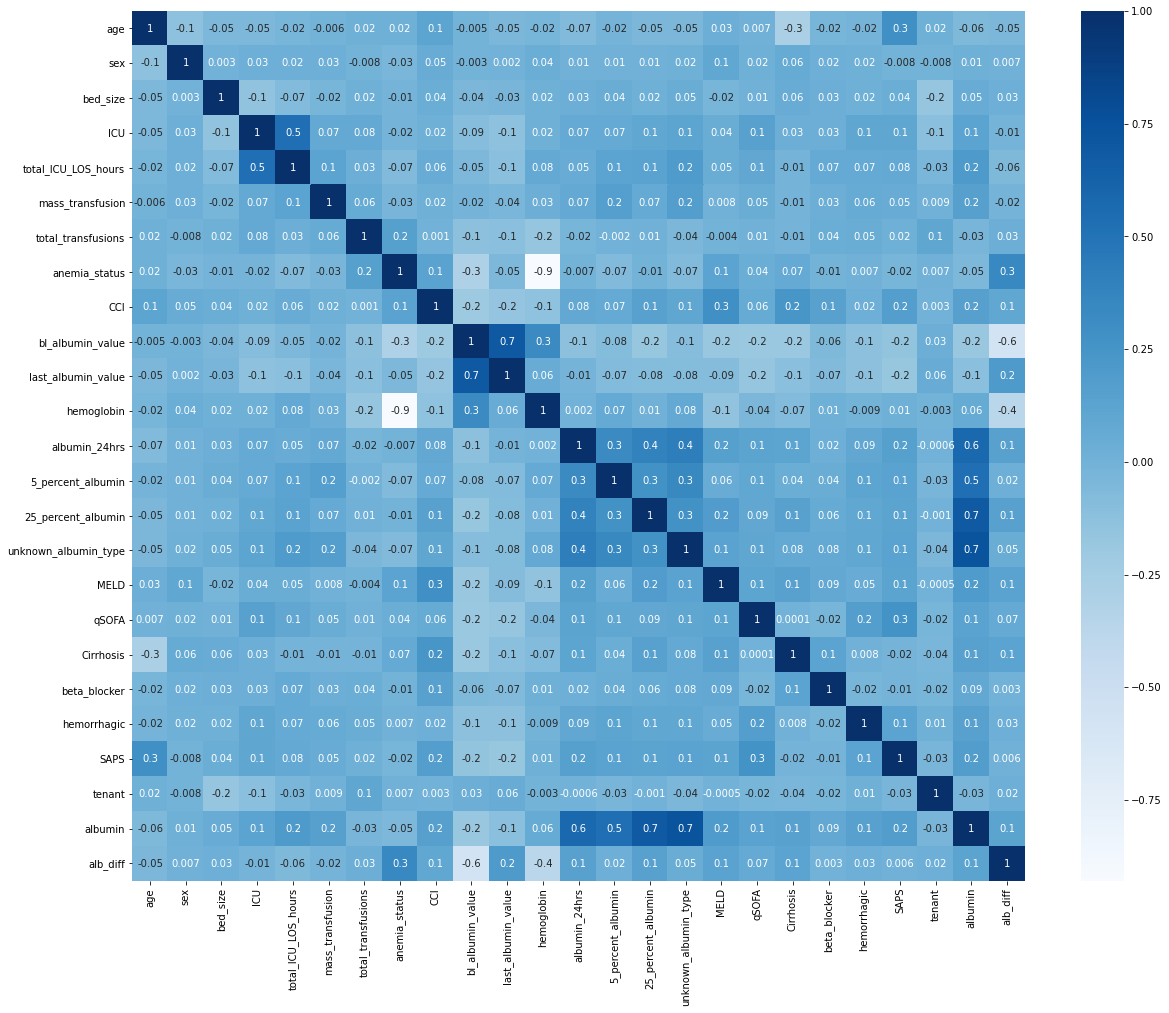

In [117]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [118]:
df.head()

age  sex  bed_size  ICU  total_ICU_LOS_hours  mass_transfusion  \
0  45.0    1       5.0    1          7956.633333                 0   
1  73.0    1       4.0    0             0.000000                 0   
2  44.0    1       5.0    0             0.000000                 0   
3  65.0    1       5.0    0             0.000000                 0   
4  83.0    1       2.0    0             0.000000                 0   

   total_transfusions  anemia_status  CCI  bl_albumin_value  \
0                   1            2.0    6               2.9   
1                   0            3.0    2               1.5   
2                   0            2.0    3               1.5   
3                   1            2.0    4               3.3   
4                   0            0.0    4               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

In [119]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'total_ICU_LOS_hours', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'bl_albumin_value', 'last_albumin_value', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [120]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['total_ICU_LOS_hours'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [121]:
sig_df

Var      Corr        p-value
0                    age -0.022640   1.367187e-03
1                    sex  0.022183   1.707736e-03
2               bed_size -0.071690   3.344730e-24
3                    ICU  0.525446   0.000000e+00
4    total_ICU_LOS_hours  1.000000   0.000000e+00
5       mass_transfusion  0.130579   9.516434e-77
6     total_transfusions  0.030086   2.092797e-05
7          anemia_status -0.068888   1.816826e-22
8                    CCI  0.057245   5.481376e-16
9       bl_albumin_value -0.049758   1.929018e-12
10    last_albumin_value -0.112283   4.193984e-57
11            hemoglobin  0.079244   3.188676e-29
12         albumin_24hrs  0.050647   7.750239e-13
13     5_percent_albumin  0.131967   2.315488e-78
14    25_percent_albumin  0.134697   1.374390e-81
15  unknown_albumin_type  0.199790  4.183214e-179
16                  MELD  0.048367   7.782914e-12
17                 qSOFA  0.095483   1.025266e-41
18             Cirrhosis -0.010730   1.292208e-01
19          beta_blocker  0.069768   5.270337e-23
20           hemorrhagic  0.072614   8.643036e-25
21                  SAPS  0.079687   1.560763e-29
22                tenant -0.032930   3.207042e-06
23               albumin  0.201093  1.805591e-181
24              alb_diff -0.061186   4.755519e-18

In [122]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
0                    age -0.022640   1.367187e-03
1                    sex  0.022183   1.707736e-03
2               bed_size -0.071690   3.344730e-24
3                    ICU  0.525446   0.000000e+00
4    total_ICU_LOS_hours  1.000000   0.000000e+00
5       mass_transfusion  0.130579   9.516434e-77
6     total_transfusions  0.030086   2.092797e-05
7          anemia_status -0.068888   1.816826e-22
8                    CCI  0.057245   5.481376e-16
9       bl_albumin_value -0.049758   1.929018e-12
10    last_albumin_value -0.112283   4.193984e-57
11            hemoglobin  0.079244   3.188676e-29
12         albumin_24hrs  0.050647   7.750239e-13
13     5_percent_albumin  0.131967   2.315488e-78
14    25_percent_albumin  0.134697   1.374390e-81
15  unknown_albumin_type  0.199790  4.183214e-179
16                  MELD  0.048367   7.782914e-12
17                 qSOFA  0.095483   1.025266e-41
19          beta_blocker  0.069768   5.270337e-23
20           hemorrhagic  0.072614   8.643036e-25
21                  SAPS  0.079687   1.560763e-29
22                tenant -0.032930   3.207042e-06
23               albumin  0.201093  1.805591e-181
24              alb_diff -0.061186   4.755519e-18

In [123]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var     Corr   p-value
18  Cirrhosis -0.01073  0.129221

## 30D Mortality

In [124]:
# drop other dvs: LOS_hours, 30_day_readmission

df = f_df.drop(columns=['LOS_hours', '30_day_readmission', \
                       'total_ICU_LOS_hours', 'days_until_readmission'])

In [125]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
3  65.0    1       5.0    0                 0                   1   
4  83.0    1       2.0    0                 0                   0   

   anemia_status  CCI  30_day_mortality  bl_albumin_value  last_albumin_value  \
0            2.0    6                 0               2.9                 3.2   
1            3.0    2                 0               1.5                 1.8   
2            2.0    3                 0               1.5                 3.5   
3            2.0    4                 0               3.3                 2.7   
4            0.0    4                 0               3.9                 3.0   

   hemoglobin  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0         8.4            0.0                0.0                 0.0   
1         5.6            0.0                0.0                 1.0   
2         8.3            0.0                0.0                 1.0   
3         8.4            0.0                0.0                 1.0   
4        11.3            0.0                0.0                 1.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
1                   0.0   9.0      0          1             0            0   
2                   0.0  18.0      3          0             1            0   
3                   0.0  20.0      0          0             0            0   
4                   0.0  17.0      0          0             1            0   

   SAPS  tenant  albumin  alb_diff  
0    34      45        1       0.3  
1    43     111        1       0.3  
2    45      63        1       2.0  
3    41      57        1      -0.6  
4    29      34        1      -0.9

## Correlations

In [126]:
# look at variable correlations with 30 day mortality
corr_mat = f_df.corr()['30_day_mortality']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

last_albumin_value       -0.128453
days_until_readmission   -0.111666
bl_albumin_value         -0.094132
alb_diff                 -0.019614
beta_blocker             -0.017990
tenant                   -0.016609
hemoglobin               -0.002934
total_transfusions        0.001785
anemia_status             0.002073
sex                       0.009820
Cirrhosis                 0.017345
bed_size                  0.017670
mass_transfusion          0.024592
total_ICU_LOS_hours       0.041104
albumin_24hrs             0.043477
hemorrhagic               0.043539
LOS_hours                 0.044275
age                       0.051623
ICU                       0.055608
unknown_albumin_type      0.066718
5_percent_albumin         0.068676
MELD                      0.075853
qSOFA                     0.083633
albumin                   0.098004
25_percent_albumin        0.098639
SAPS                      0.102575
CCI                       0.103340
30_day_readmission        0.201864
30_day_mortality    

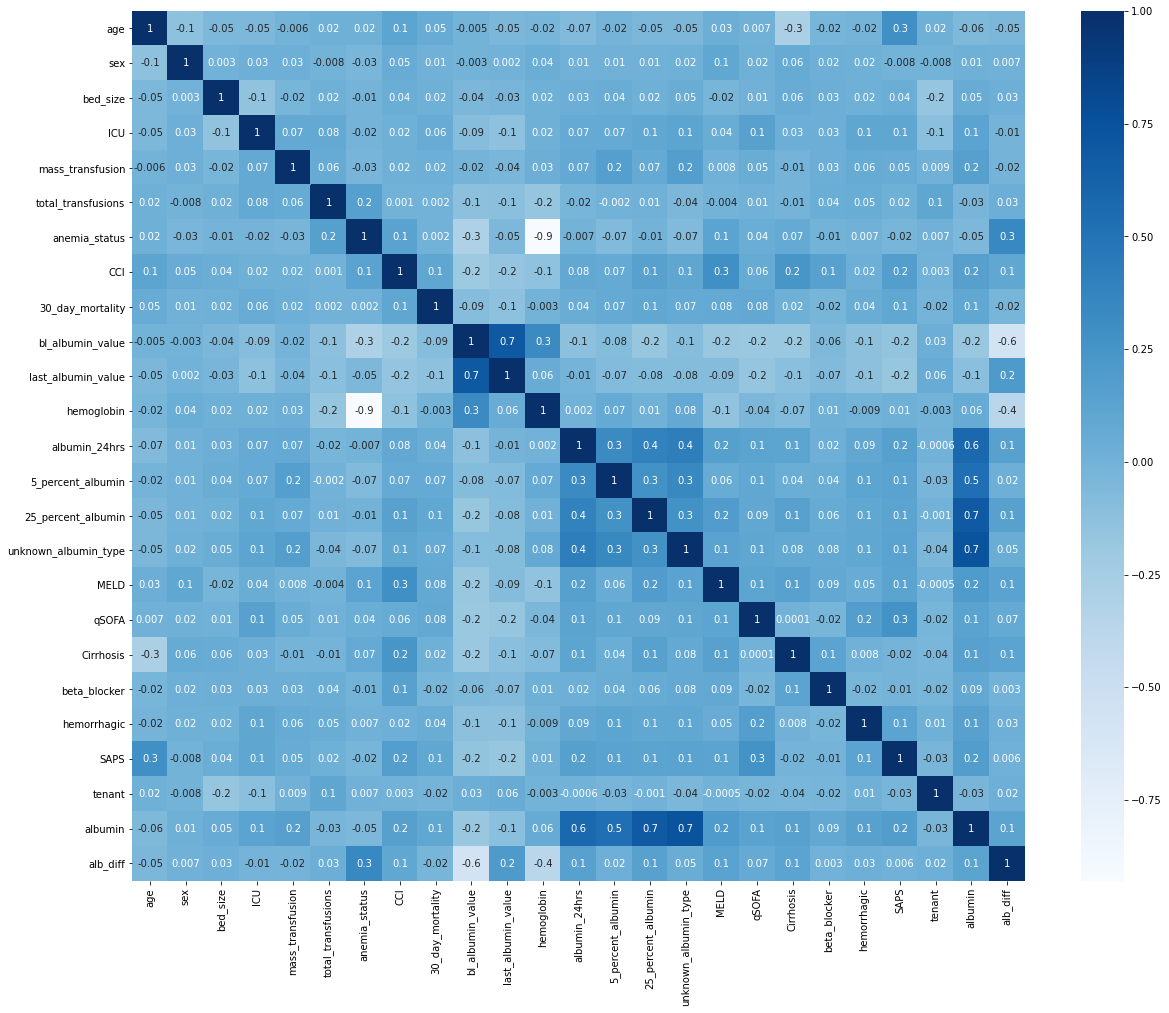

In [127]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [128]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
3  65.0    1       5.0    0                 0                   1   
4  83.0    1       2.0    0                 0                   0   

   anemia_status  CCI  30_day_mortality  bl_albumin_value  last_albumin_value  \
0            2.0    6                 0               2.9                 3.2   
1            3.0    2                 0               1.5                 1.8   
2            2.0    3                 0               1.5                 3.5   
3            2.0    4                 0               3.3                 2.7   
4            0.0    4                 0               3.9                 3.0   

   hemoglobin  albumin_24hrs  5_percent_albumin  25_percent_albumin  \
0         8.4            0.0                0.0                 0.0   
1         5.6            0.0                0.0                 1.0   
2         8.3            0.0                0.0                 1.0   
3         8.4            0.0                0.0                 1.0   
4        11.3            0.0                0.0                 1.0   

   unknown_albumin_type  MELD  qSOFA  Cirrhosis  beta_blocker  hemorrhagic  \
0                   1.0  11.0      1          0             1            0   
1                   0.0   9.0      0          1             0            0   
2                   0.0  18.0      3          0             1            0   
3                   0.0  20.0      0          0             0            0   
4                   0.0  17.0      0          0             1            0   

   SAPS  tenant  albumin  alb_diff  
0    34      45        1       0.3  
1    43     111        1       0.3  
2    45      63        1       2.0  
3    41      57        1      -0.6  
4    29      34        1      -0.9

In [129]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_mortality', 'bl_albumin_value', 'last_albumin_value', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [130]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['30_day_mortality'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [131]:
sig_df

Var      Corr       p-value
0                    age  0.051623  2.798265e-13
1                    sex  0.009820  1.649946e-01
2               bed_size  0.017670  1.247167e-02
3                    ICU  0.055608  3.591235e-15
4       mass_transfusion  0.024592  5.059622e-04
5     total_transfusions  0.001785  8.007566e-01
6          anemia_status  0.002073  7.694470e-01
7                    CCI  0.103340  1.341852e-48
8       30_day_mortality  1.000000  0.000000e+00
9       bl_albumin_value -0.094132  1.378384e-40
10    last_albumin_value -0.128453  2.611379e-74
11            hemoglobin -0.002934  6.782860e-01
12         albumin_24hrs  0.043477  7.745400e-10
13     5_percent_albumin  0.068676  2.441892e-22
14    25_percent_albumin  0.098639  2.051844e-44
15  unknown_albumin_type  0.066718  3.598355e-21
16                  MELD  0.075853  6.594037e-27
17                 qSOFA  0.083633  2.273573e-32
18             Cirrhosis  0.017345  1.418685e-02
19          beta_blocker -0.017990  1.096730e-02
20           hemorrhagic  0.043539  7.332834e-10
21                  SAPS  0.102575  6.636369e-48
22                tenant -0.016609  1.885340e-02
23               albumin  0.098004  7.275423e-44
24              alb_diff -0.019614  5.546780e-03

In [132]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr       p-value
0                    age  0.051623  2.798265e-13
2               bed_size  0.017670  1.247167e-02
3                    ICU  0.055608  3.591235e-15
4       mass_transfusion  0.024592  5.059622e-04
7                    CCI  0.103340  1.341852e-48
8       30_day_mortality  1.000000  0.000000e+00
9       bl_albumin_value -0.094132  1.378384e-40
10    last_albumin_value -0.128453  2.611379e-74
12         albumin_24hrs  0.043477  7.745400e-10
13     5_percent_albumin  0.068676  2.441892e-22
14    25_percent_albumin  0.098639  2.051844e-44
15  unknown_albumin_type  0.066718  3.598355e-21
16                  MELD  0.075853  6.594037e-27
17                 qSOFA  0.083633  2.273573e-32
18             Cirrhosis  0.017345  1.418685e-02
19          beta_blocker -0.017990  1.096730e-02
20           hemorrhagic  0.043539  7.332834e-10
21                  SAPS  0.102575  6.636369e-48
22                tenant -0.016609  1.885340e-02
23               albumin  0.098004  7.275423e-44
24              alb_diff -0.019614  5.546780e-03

In [133]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
1                  sex  0.009820  0.164995
5   total_transfusions  0.001785  0.800757
6        anemia_status  0.002073  0.769447
11          hemoglobin -0.002934  0.678286

## 30D Readmission

In [134]:
# drop other dvs: LOS_hours, 30_day_mortality

df = f_df.drop(columns=['LOS_hours', '30_day_mortality', \
                       'total_ICU_LOS_hours', 'days_until_readmission'])

In [135]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
3  65.0    1       5.0    0                 0                   1   
4  83.0    1       2.0    0                 0                   0   

   anemia_status  CCI  30_day_readmission  bl_albumin_value  \
0            2.0    6                   0               2.9   
1            3.0    2                   0               1.5   
2            2.0    3                   0               1.5   
3            2.0    4                   0               3.3   
4            0.0    4                   1               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

## Correlations

In [136]:
# look at variable correlations with 30 day readmission
corr_mat = df.corr()['30_day_readmission']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

last_albumin_value     -0.108290
bl_albumin_value       -0.099400
tenant                 -0.040189
hemoglobin             -0.029835
age                    -0.014827
5_percent_albumin       0.003291
mass_transfusion        0.004458
alb_diff                0.010606
sex                     0.011555
beta_blocker            0.014709
MELD                    0.019238
hemorrhagic             0.020109
Cirrhosis               0.023123
unknown_albumin_type    0.024772
albumin_24hrs           0.028358
anemia_status           0.033615
ICU                     0.039419
albumin                 0.040523
qSOFA                   0.042271
SAPS                    0.047395
25_percent_albumin      0.050326
CCI                     0.075671
total_transfusions      0.087601
bed_size                0.090830
30_day_readmission      1.000000
Name: 30_day_readmission, dtype: float64


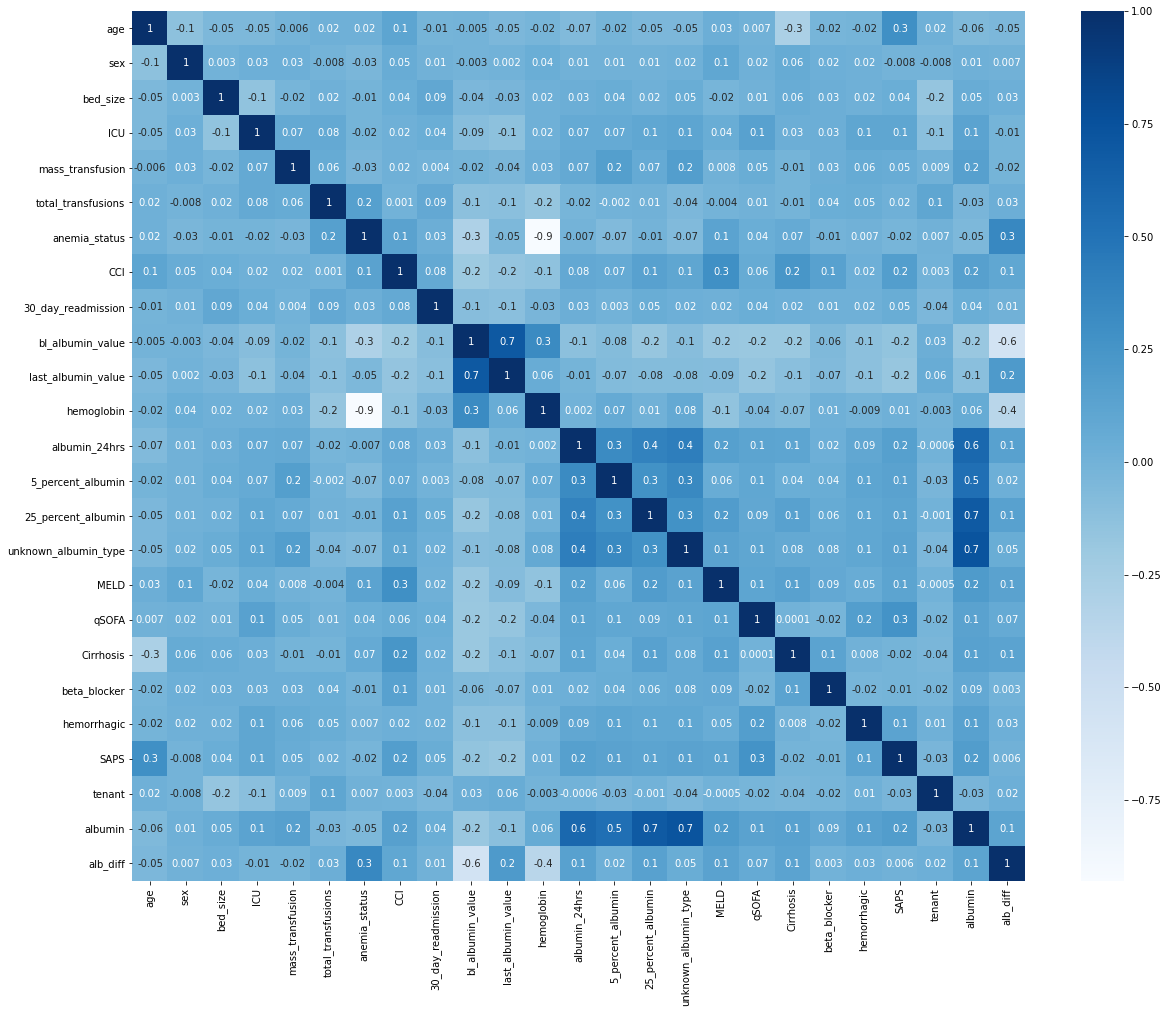

In [137]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [138]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
3  65.0    1       5.0    0                 0                   1   
4  83.0    1       2.0    0                 0                   0   

   anemia_status  CCI  30_day_readmission  bl_albumin_value  \
0            2.0    6                   0               2.9   
1            3.0    2                   0               1.5   
2            2.0    3                   0               1.5   
3            2.0    4                   0               3.3   
4            0.0    4                   1               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

In [139]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', '30_day_readmission', 'bl_albumin_value', 'last_albumin_value', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [140]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['30_day_readmission'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [141]:
sig_df

Var      Corr       p-value
0                    age -0.014827  3.603416e-02
1                    sex  0.011555  1.023038e-01
2               bed_size  0.090830  6.735080e-38
3                    ICU  0.039419  2.467456e-08
4       mass_transfusion  0.004458  5.284579e-01
5     total_transfusions  0.087601  2.320847e-35
6          anemia_status  0.033615  1.993562e-06
7                    CCI  0.075671  8.719124e-27
8     30_day_readmission  1.000000  0.000000e+00
9       bl_albumin_value -0.099400  4.451305e-45
10    last_albumin_value -0.108290  3.224085e-53
11            hemoglobin -0.029835  2.451978e-05
12         albumin_24hrs  0.028358  6.064983e-05
13     5_percent_albumin  0.003291  6.417407e-01
14    25_percent_albumin  0.050326  1.079766e-12
15  unknown_albumin_type  0.024772  4.601162e-04
16                  MELD  0.019238  6.522622e-03
17                 qSOFA  0.042271  2.242185e-09
18             Cirrhosis  0.023123  1.076211e-03
19          beta_blocker  0.014709  3.754375e-02
20           hemorrhagic  0.020109  4.463099e-03
21                  SAPS  0.047395  2.015551e-11
22                tenant -0.040189  1.312071e-08
23               albumin  0.040523  9.936303e-09
24              alb_diff  0.010606  1.337359e-01

In [142]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr       p-value
0                    age -0.014827  3.603416e-02
2               bed_size  0.090830  6.735080e-38
3                    ICU  0.039419  2.467456e-08
5     total_transfusions  0.087601  2.320847e-35
6          anemia_status  0.033615  1.993562e-06
7                    CCI  0.075671  8.719124e-27
8     30_day_readmission  1.000000  0.000000e+00
9       bl_albumin_value -0.099400  4.451305e-45
10    last_albumin_value -0.108290  3.224085e-53
11            hemoglobin -0.029835  2.451978e-05
12         albumin_24hrs  0.028358  6.064983e-05
14    25_percent_albumin  0.050326  1.079766e-12
15  unknown_albumin_type  0.024772  4.601162e-04
16                  MELD  0.019238  6.522622e-03
17                 qSOFA  0.042271  2.242185e-09
18             Cirrhosis  0.023123  1.076211e-03
19          beta_blocker  0.014709  3.754375e-02
20           hemorrhagic  0.020109  4.463099e-03
21                  SAPS  0.047395  2.015551e-11
22                tenant -0.040189  1.312071e-08
23               albumin  0.040523  9.936303e-09

In [143]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
1                 sex  0.011555  0.102304
4    mass_transfusion  0.004458  0.528458
13  5_percent_albumin  0.003291  0.641741
24           alb_diff  0.010606  0.133736

## Days Until Readmission

In [144]:
# drop other dvs: LOS_hours, 30_day_mortality

df = f_df.drop(columns=['LOS_hours', '30_day_mortality', \
                       'total_ICU_LOS_hours', '30_day_readmission'])

In [145]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
3  65.0    1       5.0    0                 0                   1   
4  83.0    1       2.0    0                 0                   0   

   anemia_status  CCI  days_until_readmission  bl_albumin_value  \
0            2.0    6              758.111111               2.9   
1            3.0    2              771.349306               1.5   
2            2.0    3              524.800694               1.5   
3            2.0    4              127.484722               3.3   
4            0.0    4               28.059722               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

## Correlations

In [146]:
# look at variable correlations with days_until_readmission
corr_mat = df.corr()['days_until_readmission']
sorted_mat = corr_mat.sort_values()
print(sorted_mat)

CCI                      -0.152788
albumin                  -0.078863
MELD                     -0.070606
SAPS                     -0.067849
25_percent_albumin       -0.066577
total_transfusions       -0.060090
unknown_albumin_type     -0.059567
Cirrhosis                -0.054762
bed_size                 -0.045635
albumin_24hrs            -0.043010
qSOFA                    -0.042761
anemia_status            -0.042040
beta_blocker             -0.036311
5_percent_albumin        -0.027352
ICU                      -0.022937
alb_diff                 -0.018890
hemorrhagic              -0.016569
mass_transfusion         -0.010023
sex                      -0.005091
age                       0.017874
tenant                    0.019899
hemoglobin                0.038018
bl_albumin_value          0.100938
last_albumin_value        0.102874
days_until_readmission    1.000000
Name: days_until_readmission, dtype: float64


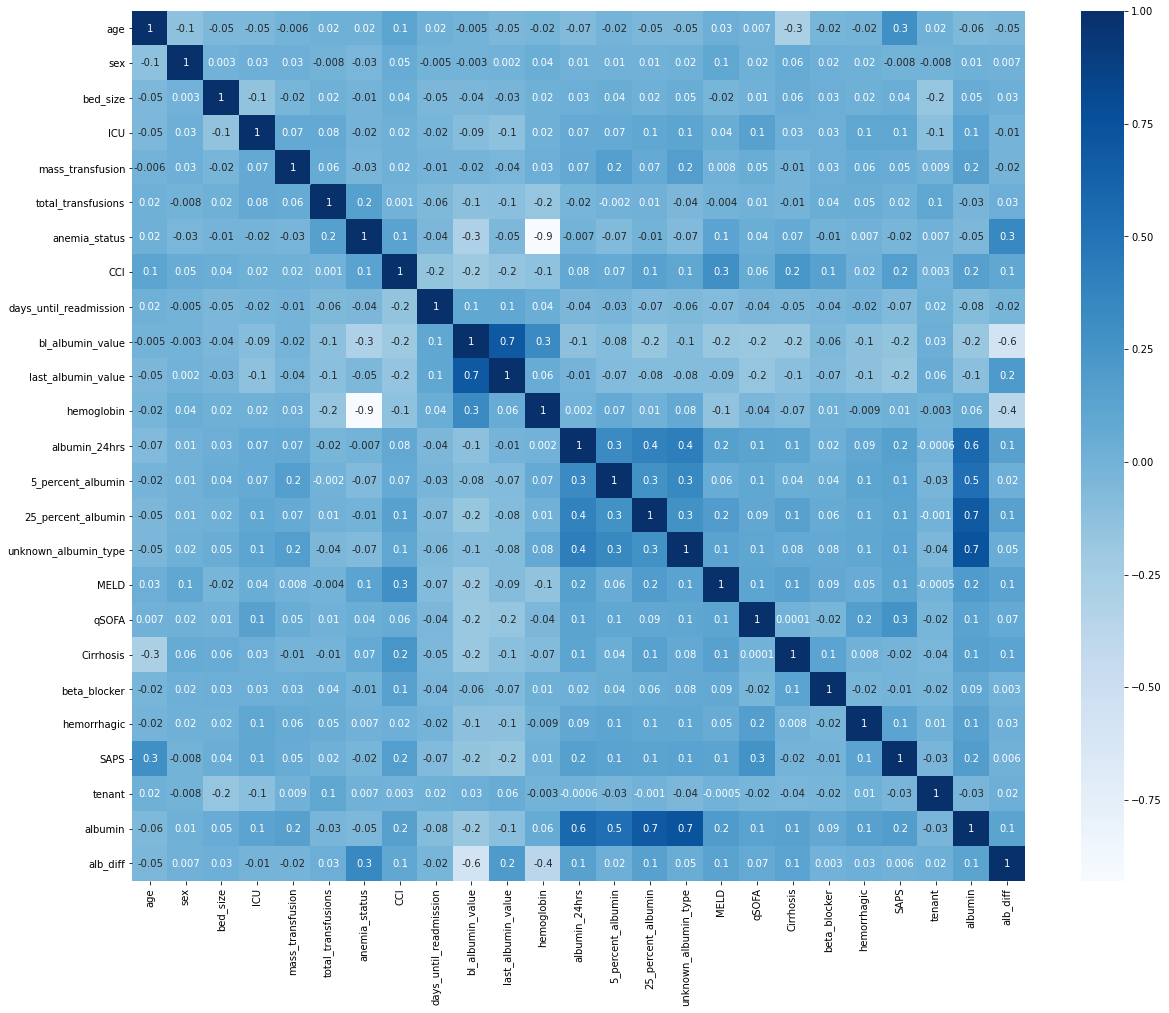

In [147]:
# visualizing correlations with heatmap
plt.figure(figsize=(20,16))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt='.1g')

## Statistical Significance: P-values

In [148]:
df.head()

age  sex  bed_size  ICU  mass_transfusion  total_transfusions  \
0  45.0    1       5.0    1                 0                   1   
1  73.0    1       4.0    0                 0                   0   
2  44.0    1       5.0    0                 0                   0   
3  65.0    1       5.0    0                 0                   1   
4  83.0    1       2.0    0                 0                   0   

   anemia_status  CCI  days_until_readmission  bl_albumin_value  \
0            2.0    6              758.111111               2.9   
1            3.0    2              771.349306               1.5   
2            2.0    3              524.800694               1.5   
3            2.0    4              127.484722               3.3   
4            0.0    4               28.059722               3.9   

   last_albumin_value  hemoglobin  albumin_24hrs  5_percent_albumin  \
0                 3.2         8.4            0.0                0.0   
1                 1.8         5.6            0.0                0.0   
2                 3.5         8.3            0.0                0.0   
3                 2.7         8.4            0.0                0.0   
4                 3.0        11.3            0.0                0.0   

   25_percent_albumin  unknown_albumin_type  MELD  qSOFA  Cirrhosis  \
0                 0.0                   1.0  11.0      1          0   
1                 1.0                   0.0   9.0      0          1   
2                 1.0                   0.0  18.0      3          0   
3                 1.0                   0.0  20.0      0          0   
4                 1.0                   0.0  17.0      0          0   

   beta_blocker  hemorrhagic  SAPS  tenant  albumin  alb_diff  
0             1            0    34      45        1       0.3  
1             0            0    43     111        1       0.3  
2             1            0    45      63        1       2.0  
3             0            0    41      57        1      -0.6  
4             1            0    29      34        1      -0.9

In [149]:
ivs = df.columns.tolist()
print(ivs)

['age', 'sex', 'bed_size', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'days_until_readmission', 'bl_albumin_value', 'last_albumin_value', 'hemoglobin', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'SAPS', 'tenant', 'albumin', 'alb_diff']


In [150]:
sig_df = []

for iv in ivs:
    r, p = stats.pearsonr(df['days_until_readmission'], df[iv])
    lst = [iv, r, p]
    sig_df.append(lst)

sig_df = pd.DataFrame(sig_df, columns=['Var', 'Corr', 'p-value'])

In [151]:
sig_df

Var      Corr        p-value
0                      age  0.017874   1.149069e-02
1                      sex -0.005091   4.716194e-01
2                 bed_size -0.045635   1.078146e-10
3                      ICU -0.022937   1.181107e-03
4         mass_transfusion -0.010023   1.564258e-01
5       total_transfusions -0.060090   1.836688e-17
6            anemia_status -0.042040   2.737728e-09
7                      CCI -0.152788  1.067437e-104
8   days_until_readmission  1.000000   0.000000e+00
9         bl_albumin_value  0.100938   1.950904e-46
10      last_albumin_value  0.102874   3.557272e-48
11              hemoglobin  0.038018   7.566600e-08
12           albumin_24hrs -0.043010   1.172594e-09
13       5_percent_albumin -0.027352   1.097509e-04
14      25_percent_albumin -0.066577   4.358768e-21
15    unknown_albumin_type -0.059567   3.471664e-17
16                    MELD -0.070606   1.598503e-23
17                   qSOFA -0.042761   1.460953e-09
18               Cirrhosis -0.054762   9.297092e-15
19            beta_blocker -0.036311   2.812570e-07
20             hemorrhagic -0.016569   1.913588e-02
21                    SAPS -0.067849   7.685233e-22
22                  tenant  0.019899   4.896001e-03
23                 albumin -0.078863   5.870258e-29
24                alb_diff -0.018890   7.560701e-03

In [152]:
sig = sig_df.loc[sig_df['p-value'] <= 0.05]
sig

Var      Corr        p-value
0                      age  0.017874   1.149069e-02
2                 bed_size -0.045635   1.078146e-10
3                      ICU -0.022937   1.181107e-03
5       total_transfusions -0.060090   1.836688e-17
6            anemia_status -0.042040   2.737728e-09
7                      CCI -0.152788  1.067437e-104
8   days_until_readmission  1.000000   0.000000e+00
9         bl_albumin_value  0.100938   1.950904e-46
10      last_albumin_value  0.102874   3.557272e-48
11              hemoglobin  0.038018   7.566600e-08
12           albumin_24hrs -0.043010   1.172594e-09
13       5_percent_albumin -0.027352   1.097509e-04
14      25_percent_albumin -0.066577   4.358768e-21
15    unknown_albumin_type -0.059567   3.471664e-17
16                    MELD -0.070606   1.598503e-23
17                   qSOFA -0.042761   1.460953e-09
18               Cirrhosis -0.054762   9.297092e-15
19            beta_blocker -0.036311   2.812570e-07
20             hemorrhagic -0.016569   1.913588e-02
21                    SAPS -0.067849   7.685233e-22
22                  tenant  0.019899   4.896001e-03
23                 albumin -0.078863   5.870258e-29
24                alb_diff -0.018890   7.560701e-03

In [153]:
ins = sig_df.loc[sig_df['p-value'] > 0.05]
ins

Var      Corr   p-value
1               sex -0.005091  0.471619
4  mass_transfusion -0.010023  0.156426

## Check Intercorrelations between indep. vars

## Remove Variables with High Intercorellation

In [154]:
df_iv = f_df.drop(columns= ['LOS_hours', '30_day_mortality', '30_day_readmission', \
                            'total_ICU_LOS_hours', 'days_until_readmission'])

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 feature        VIF
0                    age  24.902957
1                    sex   2.281360
2               bed_size  28.686208
3                    ICU   1.384929
4       mass_transfusion   1.085363
5     total_transfusions   1.496203
6          anemia_status  12.269250
7                    CCI   3.738171
8       bl_albumin_value        inf
9     last_albumin_value        inf
10            hemoglobin  38.817562
11         albumin_24hrs   1.643011
12     5_percent_albumin   1.555101
13    25_percent_albumin   2.728907
14  unknown_albumin_type   3.109733
15                  MELD   5.155728
16                 qSOFA   1.651555
17             Cirrhosis   1.638522
18          beta_blocker   1.629784
19           hemorrhagic   1.136746
20                  SAPS   9.272965
21                tenant   8.425065
22               albumin   7.556935
23              alb_diff        inf


In [156]:
df_iv.drop(columns=['bl_albumin_value', 'last_albumin_value'], inplace=True)

In [157]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature        VIF
0                    age  24.713323
1                    sex   2.278095
2               bed_size  28.169937
3                    ICU   1.384274
4       mass_transfusion   1.085346
5     total_transfusions   1.485135
6          anemia_status  10.102650
7                    CCI   3.709647
8             hemoglobin  29.152542
9          albumin_24hrs   1.637778
10     5_percent_albumin   1.554906
11    25_percent_albumin   2.728714
12  unknown_albumin_type   3.109730
13                  MELD   5.154389
14                 qSOFA   1.633849
15             Cirrhosis   1.631909
16          beta_blocker   1.628708
17           hemorrhagic   1.131401
18                  SAPS   9.223415
19                tenant   8.293738
20               albumin   7.542680
21              alb_diff   1.877450


In [158]:
df_iv.drop(columns=['bed_size'], inplace=True)

In [159]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature        VIF
0                    age  24.586343
1                    sex   2.276258
2                    ICU   1.354182
3       mass_transfusion   1.084776
4     total_transfusions   1.477549
5          anemia_status   6.829771
6                    CCI   3.706975
7             hemoglobin  17.584126
8          albumin_24hrs   1.637726
9      5_percent_albumin   1.554724
10    25_percent_albumin   2.727932
11  unknown_albumin_type   3.109524
12                  MELD   5.153566
13                 qSOFA   1.633349
14             Cirrhosis   1.623026
15          beta_blocker   1.627451
16           hemorrhagic   1.130927
17                  SAPS   9.173510
18                tenant   8.197852
19               albumin   7.541696
20              alb_diff   1.875584


In [160]:
df_iv.drop(columns=['age'], inplace=True)

In [161]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature        VIF
0                    sex   2.251582
1                    ICU   1.351597
2       mass_transfusion   1.084743
3     total_transfusions   1.476882
4          anemia_status   4.704892
5                    CCI   3.619413
6             hemoglobin  10.984218
7          albumin_24hrs   1.634196
8      5_percent_albumin   1.554681
9     25_percent_albumin   2.727688
10  unknown_albumin_type   3.108636
11                  MELD   5.124100
12                 qSOFA   1.628327
13             Cirrhosis   1.495611
14          beta_blocker   1.627084
15           hemorrhagic   1.129797
16                  SAPS   8.174676
17                tenant   8.164130
18               albumin   7.540268
19              alb_diff   1.875198


In [162]:
df_iv.drop(columns=['albumin'], inplace=True)

In [163]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature        VIF
0                    sex   2.251242
1                    ICU   1.351579
2       mass_transfusion   1.084503
3     total_transfusions   1.475417
4          anemia_status   4.704856
5                    CCI   3.618944
6             hemoglobin  10.977587
7          albumin_24hrs   1.506708
8      5_percent_albumin   1.298693
9     25_percent_albumin   1.376829
10  unknown_albumin_type   1.468481
11                  MELD   5.122120
12                 qSOFA   1.627881
13             Cirrhosis   1.493617
14          beta_blocker   1.626383
15           hemorrhagic   1.128489
16                  SAPS   8.172809
17                tenant   8.163662
18              alb_diff   1.874349


In [164]:
df_iv.drop(columns=['hemoglobin'], inplace=True)

In [165]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature       VIF
0                    sex  2.156215
1                    ICU  1.339185
2       mass_transfusion  1.084470
3     total_transfusions  1.473918
4          anemia_status  3.822880
5                    CCI  3.614081
6          albumin_24hrs  1.505092
7      5_percent_albumin  1.298329
8     25_percent_albumin  1.376564
9   unknown_albumin_type  1.467700
10                  MELD  4.906381
11                 qSOFA  1.627162
12             Cirrhosis  1.485245
13          beta_blocker  1.602668
14           hemorrhagic  1.127213
15                  SAPS  6.562709
16                tenant  5.670428
17              alb_diff  1.646379


In [166]:
df_iv.drop(columns=['SAPS'], inplace=True)

In [167]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature       VIF
0                    sex  2.141600
1                    ICU  1.322390
2       mass_transfusion  1.084443
3     total_transfusions  1.473338
4          anemia_status  3.699810
5                    CCI  3.462188
6          albumin_24hrs  1.499780
7      5_percent_albumin  1.293483
8     25_percent_albumin  1.376304
9   unknown_albumin_type  1.465613
10                  MELD  4.749965
11                 qSOFA  1.533073
12             Cirrhosis  1.483241
13          beta_blocker  1.601721
14           hemorrhagic  1.123972
15                tenant  5.019079
16              alb_diff  1.572269


In [168]:
df_iv.drop(columns=['tenant'], inplace=True)

In [169]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_iv.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_iv.values, i)
                          for i in range(len(df_iv.columns))]
  
print(vif_data)

                 feature       VIF
0                    sex  2.070939
1                    ICU  1.320426
2       mass_transfusion  1.084029
3     total_transfusions  1.439540
4          anemia_status  3.246749
5                    CCI  3.396916
6          albumin_24hrs  1.498782
7      5_percent_albumin  1.293477
8     25_percent_albumin  1.376300
9   unknown_albumin_type  1.465229
10                  MELD  4.423583
11                 qSOFA  1.525193
12             Cirrhosis  1.483235
13          beta_blocker  1.592167
14           hemorrhagic  1.123233
15              alb_diff  1.423397


In [171]:
print(vif_data['feature'].to_list())

['sex', 'ICU', 'mass_transfusion', 'total_transfusions', 'anemia_status', 'CCI', 'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', 'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', 'beta_blocker', 'hemorrhagic', 'alb_diff']


In [172]:
# 16 independent features
f_df = f_df[['sex', 'ICU', 'mass_transfusion', 'total_transfusions', \
           'anemia_status', 'CCI', \
           'albumin_24hrs', '5_percent_albumin', '25_percent_albumin', \
           'unknown_albumin_type', 'MELD', 'qSOFA', 'Cirrhosis', \
           'beta_blocker', 'hemorrhagic', 'alb_diff', 'LOS_hours', \
            'total_ICU_LOS_hours', '30_day_mortality', \
             '30_day_readmission', 'days_until_readmission']]

In [173]:
## Export as csv for other analysis

f_df.to_csv('/Users/ianweimer/1083-albumin-data-exploration/ML/tables/albumin_cleaned_6.csv', index=False)